In [37]:
# !pip install matplotlib

In [23]:
import torch
import matplotlib.pyplot as plt
import torch.nn.functional as F
%matplotlib inline

## Reading data

In [3]:
words = open('names.txt','r').read().splitlines()
words[:3]

['emma', 'olivia', 'ava']

In [4]:
print('min length of a name:',min(len(w) for w in words))
print('max length of a name:',max(len(w) for w in words))

min length of a name: 2
max length of a name: 15


* What does **olivia** mean: Character o is likely to come first, char l is likely to come after o.....after a word is very likely to end
* We will be working on Bi-gram language model i.e. what character is likely to follow o, we only care about previous character

## Prepping for Neural Network Model

In [5]:
# source and target for bi-gram model
for w in words[:1]:
    chs=['<SOS>']+list(w)+['<EOS>'] # Provide SOS and EOS tokens
    for char_x,char_y in zip(chs,chs[1:]):
        print(char_x,' ',char_y)

<SOS>   e
e   m
m   m
m   a
a   <EOS>


### For calculating bia gram probabilities we need to get count of pair e.g. P(teacher/the)=P(the teacher)/P(the)

In [6]:
b={}
for w in words:
    chs=['<SOS>']+list(w)+['<EOS>'] # Provide SOS and EOS tokens
    for char_x,char_y in zip(chs,chs[1:]):
        biagram=(char_x,char_y)
        b[biagram]=b.get(biagram,0)+1
print(b)

{('<SOS>', 'e'): 1531, ('e', 'm'): 769, ('m', 'm'): 168, ('m', 'a'): 2590, ('a', '<EOS>'): 6640, ('<SOS>', 'o'): 394, ('o', 'l'): 619, ('l', 'i'): 2480, ('i', 'v'): 269, ('v', 'i'): 911, ('i', 'a'): 2445, ('<SOS>', 'a'): 4410, ('a', 'v'): 834, ('v', 'a'): 642, ('<SOS>', 'i'): 591, ('i', 's'): 1316, ('s', 'a'): 1201, ('a', 'b'): 541, ('b', 'e'): 655, ('e', 'l'): 3248, ('l', 'l'): 1345, ('l', 'a'): 2623, ('<SOS>', 's'): 2055, ('s', 'o'): 531, ('o', 'p'): 95, ('p', 'h'): 204, ('h', 'i'): 729, ('<SOS>', 'c'): 1542, ('c', 'h'): 664, ('h', 'a'): 2244, ('a', 'r'): 3264, ('r', 'l'): 413, ('l', 'o'): 692, ('o', 't'): 118, ('t', 't'): 374, ('t', 'e'): 716, ('e', '<EOS>'): 3983, ('<SOS>', 'm'): 2538, ('m', 'i'): 1256, ('a', 'm'): 1634, ('m', 'e'): 818, ('<SOS>', 'h'): 874, ('r', 'p'): 14, ('p', 'e'): 197, ('e', 'r'): 1958, ('r', '<EOS>'): 1377, ('e', 'v'): 463, ('v', 'e'): 568, ('l', 'y'): 1588, ('y', 'n'): 1826, ('n', '<EOS>'): 6763, ('b', 'i'): 217, ('i', 'g'): 428, ('g', 'a'): 330, ('a', 'i'):

In [7]:
sorted(b.items(), key = lambda x : -x[1])[:5] #Sorting top 5 most frequent values

[(('n', '<EOS>'), 6763),
 (('a', '<EOS>'), 6640),
 (('a', 'n'), 5438),
 (('<SOS>', 'a'), 4410),
 (('e', '<EOS>'), 3983)]

## Training Bi-Gram model

In [8]:
N=torch.zeros((28,28),dtype=torch.int32)

In [9]:
stoi = {}
for i,c in enumerate(sorted(list(set(''.join(words))))):
    stoi[c]=i
stoi['<SOS>']=26
stoi['<EOS>']=27

itos = {}
for i,c in enumerate(sorted(list(set(''.join(words))))):
    itos[i]=c
itos[26]='<SOS>'
itos[27]='<EOS>'

In [10]:
for w in words:
    chs=['<SOS>']+list(w)+['<EOS>'] # Provide SOS and EOS tokens
    for ch1, ch2 in zip(chs,chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        N[ix1,ix2] +=1    

* Rows denote previous words, Columns denote target word

In [11]:
N

tensor([[ 556,  541,  470, 1042,  692,  134,  168, 2332, 1650,  175,  568, 2528,
         1634, 5438,   63,   82,   60, 3264, 1118,  687,  381,  834,  161,  182,
         2050,  435,    0, 6640],
        [ 321,   38,    1,   65,  655,    0,    0,   41,  217,    1,    0,  103,
            0,    4,  105,    0,    0,  842,    8,    2,   45,    0,    0,    0,
           83,    0,    0,  114],
        [ 815,    0,   42,    1,  551,    0,    2,  664,  271,    3,  316,  116,
            0,    0,  380,    1,   11,   76,    5,   35,   35,    0,    0,    3,
          104,    4,    0,   97],
        [1303,    1,    3,  149, 1283,    5,   25,  118,  674,    9,    3,   60,
           30,   31,  378,    0,    1,  424,   29,    4,   92,   17,   23,    0,
          317,    1,    0,  516],
        [ 679,  121,  153,  384, 1271,   82,  125,  152,  818,   55,  178, 3248,
          769, 2675,  269,   83,   14, 1958,  861,  580,   69,  463,   50,  132,
         1070,  181,    0, 3983],
        [ 242,    0,

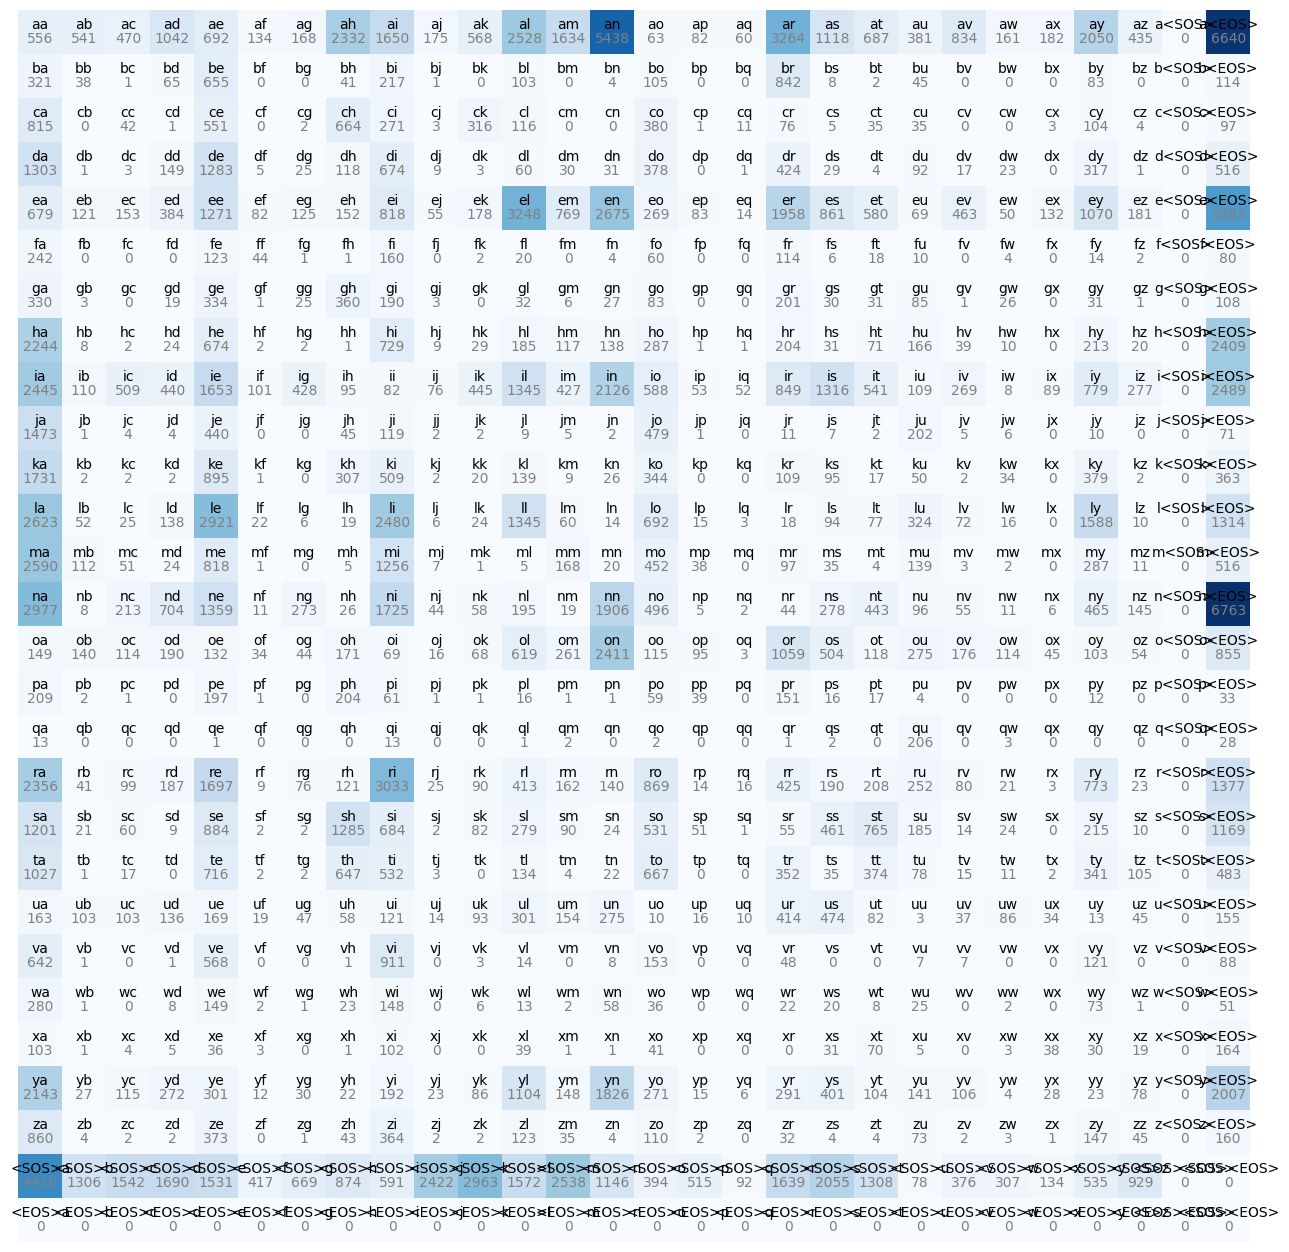

In [12]:
plt.figure(figsize=(16,16))
plt.imshow(N,cmap='Blues')
for i in range(28):
    for j in range(28):
        chstr = itos[i] + itos[j]
        plt.text(j, i, chstr, ha="center", va="bottom", color='black')
        plt.text(j, i, N[i, j].item(), ha="center", va="top", color='gray') #.item() extracts value from tensor
plt.axis('off');

# N[2,1] represents, count of cb
#To get probability out of it, divide each row with rowsum. Count(ab)/Count(a) = Probability


### We have last row as 0 and 2nd last column as 0, so we can remove [char]<SOS> and <EOS>[char] and replace them with just one special character. We just care about <SOS><EOS>, because there can be no word

In [13]:
N=torch.zeros((27,27),dtype=torch.int32)

stoi = {}
for i,c in enumerate(sorted(list(set(''.join(words))))):
    stoi[c]=i+1
stoi['.']=0

itos = {}
for i,c in enumerate(sorted(list(set(''.join(words))))):
    itos[i+1]=c
itos[0]='.'

In [14]:
for w in words:
    chs=['.']+list(w)+['.'] # Provide SOS and EOS tokens
    for ch1, ch2 in zip(chs,chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        N[ix1,ix2] +=1    
N

tensor([[   0, 4410, 1306, 1542, 1690, 1531,  417,  669,  874,  591, 2422, 2963,
         1572, 2538, 1146,  394,  515,   92, 1639, 2055, 1308,   78,  376,  307,
          134,  535,  929],
        [6640,  556,  541,  470, 1042,  692,  134,  168, 2332, 1650,  175,  568,
         2528, 1634, 5438,   63,   82,   60, 3264, 1118,  687,  381,  834,  161,
          182, 2050,  435],
        [ 114,  321,   38,    1,   65,  655,    0,    0,   41,  217,    1,    0,
          103,    0,    4,  105,    0,    0,  842,    8,    2,   45,    0,    0,
            0,   83,    0],
        [  97,  815,    0,   42,    1,  551,    0,    2,  664,  271,    3,  316,
          116,    0,    0,  380,    1,   11,   76,    5,   35,   35,    0,    0,
            3,  104,    4],
        [ 516, 1303,    1,    3,  149, 1283,    5,   25,  118,  674,    9,    3,
           60,   30,   31,  378,    0,    1,  424,   29,    4,   92,   17,   23,
            0,  317,    1],
        [3983,  679,  121,  153,  384, 1271,   82,

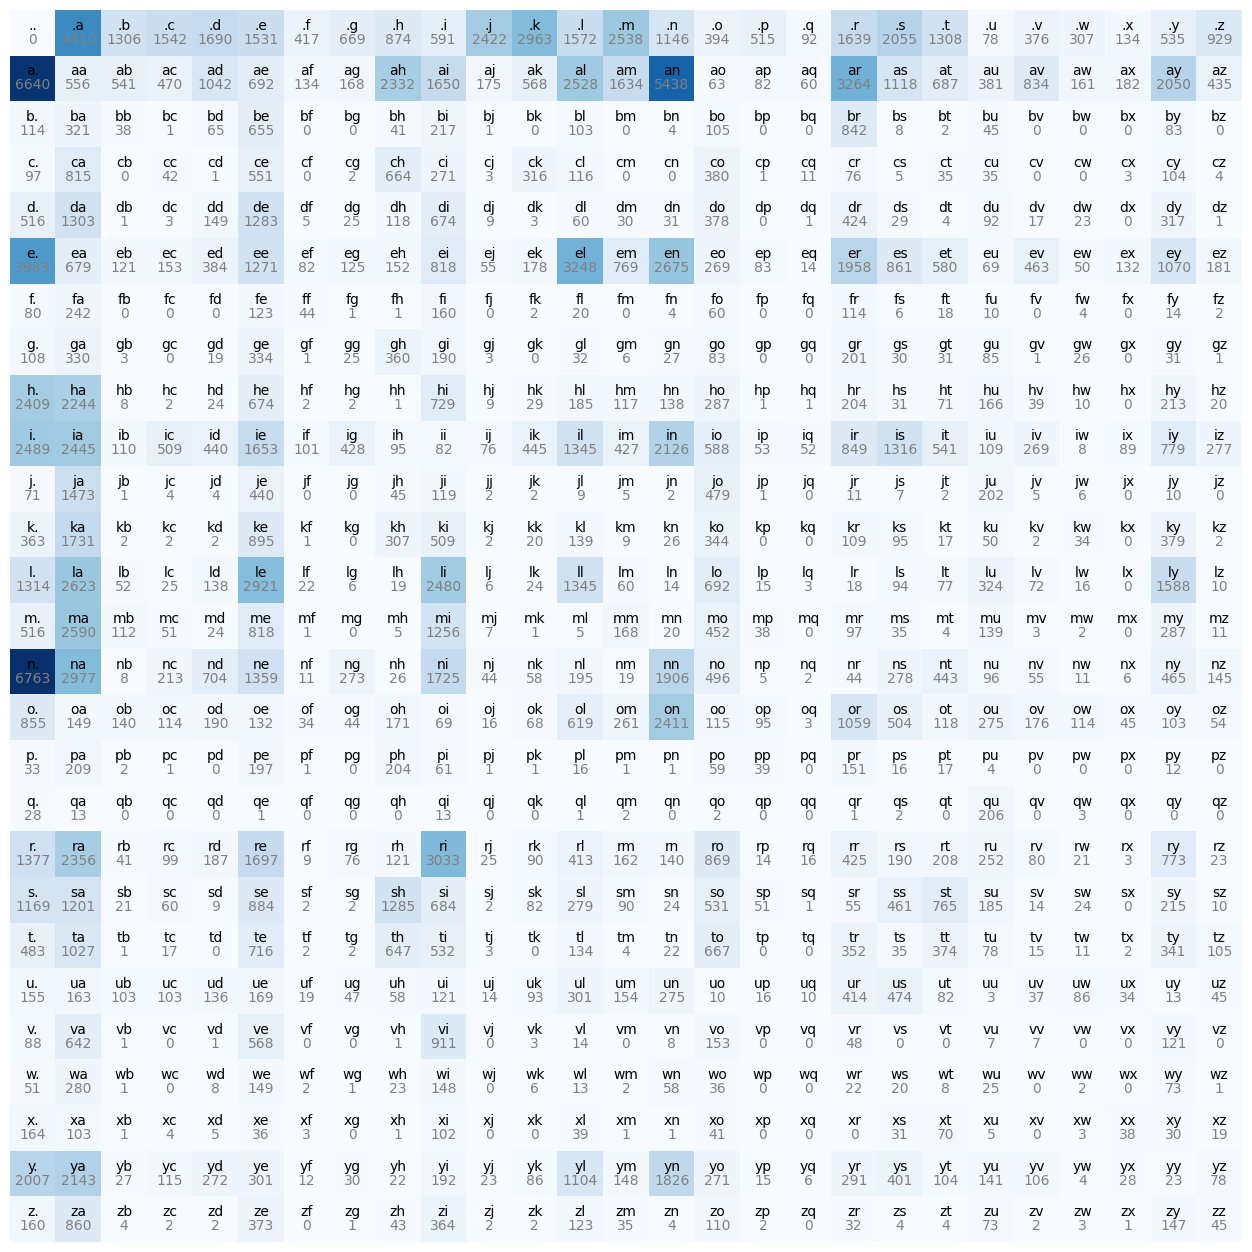

In [15]:
plt.figure(figsize=(16,16))
plt.imshow(N,cmap='Blues')
for i in range(27):
    for j in range(27):
        chstr = itos[i] + itos[j]
        plt.text(j, i, chstr, ha="center", va="bottom", color='black')
        plt.text(j, i, N[i, j].item(), ha="center", va="top", color='gray') #.item() extracts value from tensor
plt.axis('off');

# N[2,1] represents, count of cb
#To get probability out of it, divide each row with rowsum. Count(ab)/Count(a) = Probability


## Building I/P O/P tensors for Neural Network

In [76]:
xs=[]
ys=[]
for w in words:
    chs=['.']+list(w)+['.'] # Provide SOS and EOS tokens
    for ch1, ch2 in zip(chs,chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        xs.append(ix1)
        ys.append(ix2)

xs=torch.tensor(xs)
ys=torch.tensor(ys)
            


* When input to the neural network is 0, output should be 5. In other words when 0 is inputted, 5 should have high probability
* We can't just input indexes into the neural network because weights are going to get multiplies by these, leaving biased outputs, so we one-hot encode

In [77]:
print(xs)
print(ys)


tensor([ 0,  5, 13,  ..., 25, 26, 24])
tensor([ 5, 13, 13,  ..., 26, 24,  0])


In [37]:
x_enc = F.one_hot(xs,27).float() #Floats can feed into neural nets
x_enc

tensor([[1., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 1., 0.],
        [0., 0., 0.,  ..., 0., 0., 1.],
        [0., 0., 0.,  ..., 1., 0., 0.]])

* Weights initialization
* Output interpretation. We assume that numbers are log counts and we exponent them

In [39]:
#Forward Pass
g=torch.Generator().manual_seed(2147483647)
W=torch.randn((27,27),generator=g) #Takes 27X27 numbers from uniform distribution. 2nd 27 denotes number of neurons
logits=x_enc @ W # Matrix multiplication
probs = logits.exp()
probs = probs/probs.sum(1,keepdim=True)
probs
# Last two layers are softmax. It's a way of taking outputs of a neural layers and these outputs can be positive or negative, and it outputs probability distribution
# All these functions are differentiable, so we can back propagate the network and change the values of weights

tensor([[0.0607, 0.0100, 0.0123,  ..., 0.0118, 0.1537, 0.1459],
        [0.0290, 0.0796, 0.0248,  ..., 0.0118, 0.0022, 0.0472],
        [0.0312, 0.0737, 0.0484,  ..., 0.1204, 0.0469, 0.0126],
        ...,
        [0.0301, 0.0080, 0.0090,  ..., 0.0125, 0.0531, 0.0111],
        [0.0634, 0.0270, 0.0101,  ..., 0.0833, 0.0175, 0.0517],
        [0.0308, 0.0113, 0.0178,  ..., 0.0190, 0.0116, 0.0562]])

In [69]:
print(xs[0].item(),ys[0].item())
print(itos[xs[0].item()],itos[ys[0].item()])
print('Input: ',x_enc[xs[0].item()])
print('Output: ',probs[ys[0].item()])
print('Target: ',ys[0].item())
print('Probability of correct number',probs[ys[0].item()][ys[0].item()])
print('Log lokelihood: ',torch.log(probs[ys[0].item()][ys[0].item()]))
print('- Log lokelihood: ',-torch.log(probs[ys[0].item()][ys[0].item()]))


0 5
. e
Input:  tensor([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0.])
Output:  tensor([0.0607, 0.0100, 0.0123, 0.0042, 0.0168, 0.0123, 0.0027, 0.0232, 0.0137,
        0.0313, 0.0079, 0.0278, 0.0091, 0.0082, 0.0500, 0.2378, 0.0603, 0.0025,
        0.0249, 0.0055, 0.0339, 0.0109, 0.0029, 0.0198, 0.0118, 0.1537, 0.1459])
Target:  5
Probability of correct number tensor(0.0123)
Log lokelihood:  tensor(-4.3993)
- Log lokelihood:  tensor(4.3993)


In [141]:
#Initialization
g=torch.Generator().manual_seed(2147483647)
W=torch.randn((27,27),generator=g, requires_grad=True) #Takes 27X27 numbers from uniform distribution. 2nd 27 denotes number of neurons. Requires_grad, to calculate gradient

In [142]:
for i in range(20):
    #Forward Pass
    logits=x_enc @ W # Matrix multiplication
    probs = logits.exp()
    probs = probs/probs.sum(1,keepdim=True)
    # Last two layers are softmax. It's a way of taking outputs of a neural layers and these outputs can be positive or negative, and it outputs probability distribution
    # All these functions are differentiable, so we can back propagate the network and change the values of weights
    #Loss Calculation
    loss=-probs[torch.arange(228146),ys].log().mean()
    print(loss)
    # Backward Pass
    W.grad=None
    loss.backward() # Fills gradients all the way back to W (parameters)
    W.data+=-0.9*W.grad #If we check forward pass again, loss will be slightly less




tensor(3.6926, grad_fn=<NegBackward0>)
tensor(3.6841, grad_fn=<NegBackward0>)
tensor(3.6758, grad_fn=<NegBackward0>)
tensor(3.6676, grad_fn=<NegBackward0>)
tensor(3.6594, grad_fn=<NegBackward0>)
tensor(3.6514, grad_fn=<NegBackward0>)
tensor(3.6436, grad_fn=<NegBackward0>)
tensor(3.6358, grad_fn=<NegBackward0>)
tensor(3.6281, grad_fn=<NegBackward0>)
tensor(3.6206, grad_fn=<NegBackward0>)
tensor(3.6131, grad_fn=<NegBackward0>)
tensor(3.6057, grad_fn=<NegBackward0>)
tensor(3.5984, grad_fn=<NegBackward0>)
tensor(3.5913, grad_fn=<NegBackward0>)
tensor(3.5842, grad_fn=<NegBackward0>)
tensor(3.5772, grad_fn=<NegBackward0>)
tensor(3.5702, grad_fn=<NegBackward0>)
tensor(3.5634, grad_fn=<NegBackward0>)
tensor(3.5566, grad_fn=<NegBackward0>)
tensor(3.5500, grad_fn=<NegBackward0>)
